In [103]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [104]:
df = pd.DataFrame()
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['y'] = [1,1,0,1,0,1,0,1,0,0]
df['weight'] = 1/df.shape[0]

In [105]:
df

,x1,x2,y,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


Iteration 1

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

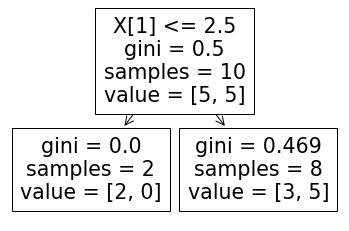

In [106]:
dtc = DecisionTreeClassifier(max_depth=1)
x = df.iloc[:,0:2].values
y = df.iloc[:,-2:-1].values
dtc.fit(x,y)
plot_tree(dtc)

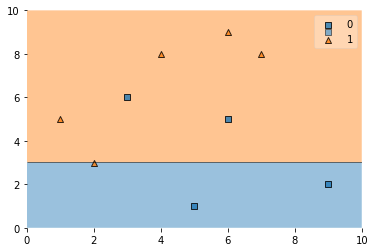

In [107]:
x1 = df.iloc[:,0:2].values
y1 = df.iloc[:,-2:-1].values.reshape(-1)
plot_decision_regions(x1,y1,clf=dtc,legend=1)


In [108]:
df['ypredict'] = dtc.predict(x)

In [109]:
df

,x1,x2,y,weight,ypredict
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [110]:
def calculated_model_weight(error):
    return 0.5*np.log((1-error)/(error+0.0001))
alpha1 = calculated_model_weight(0.3)
alpha1

0.42348229129854165

In [111]:
def update_row_weight(row,alpha=alpha1):
    if row['y']==row['ypredict']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)
df['updated_weight'] = df.apply(update_row_weight,axis=1)
df

,x1,x2,y,weight,ypredict,updated_weight
0,1,5,1,0.1,1,0.065476
1,2,3,1,0.1,1,0.065476
2,3,6,0,0.1,1,0.152727
3,4,8,1,0.1,1,0.065476
4,5,1,0,0.1,0,0.065476
5,6,9,1,0.1,1,0.065476
6,6,5,0,0.1,1,0.152727
7,7,8,1,0.1,1,0.065476
8,9,9,0,0.1,1,0.152727
9,9,2,0,0.1,0,0.065476


In [112]:
df['normalized'] = df['updated_weight']/df['updated_weight'].sum()

In [113]:
df

,x1,x2,y,weight,ypredict,updated_weight,normalized
0,1,5,1,0.1,1,0.065476,0.071440
1,2,3,1,0.1,1,0.065476,0.071440
2,3,6,0,0.1,1,0.152727,0.166639
3,4,8,1,0.1,1,0.065476,0.071440
4,5,1,0,0.1,0,0.065476,0.071440
5,6,9,1,0.1,1,0.065476,0.071440
6,6,5,0,0.1,1,0.152727,0.166639
7,7,8,1,0.1,1,0.065476,0.071440
8,9,9,0,0.1,1,0.152727,0.166639
9,9,2,0,0.1,0,0.065476,0.071440


In [114]:
df['upper'] = np.cumsum(df['normalized'])
df['lower'] = df['upper']-df['normalized']

In [115]:
df

,x1,x2,y,weight,ypredict,updated_weight,normalized,upper,lower
0,1,5,1,0.1,1,0.065476,0.071440,0.071440,0.000000
1,2,3,1,0.1,1,0.065476,0.071440,0.142881,0.071440
2,3,6,0,0.1,1,0.152727,0.166639,0.309520,0.142881
3,4,8,1,0.1,1,0.065476,0.071440,0.380960,0.309520
4,5,1,0,0.1,0,0.065476,0.071440,0.452401,0.380960
5,6,9,1,0.1,1,0.065476,0.071440,0.523841,0.452401
6,6,5,0,0.1,1,0.152727,0.166639,0.690480,0.523841
7,7,8,1,0.1,1,0.065476,0.071440,0.761921,0.690480
8,9,9,0,0.1,1,0.152727,0.166639,0.928560,0.761921
9,9,2,0,0.1,0,0.065476,0.071440,1.000000,0.928560


In [116]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['upper']> a and a>row['lower']:
                indices.append(index)
    return indices
indexvalue = create_new_dataset(df)
indexvalue
    

[6, 3, 4, 8, 6, 2, 2, 5, 2, 5]

In [117]:
df2 = df.iloc[indexvalue,[0,1,2,3]]
df2

,x1,x2,y,weight
6,6,5,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
5,6,9,1,0.1


# Iteration 2

[Text(0.5, 0.75, 'X[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

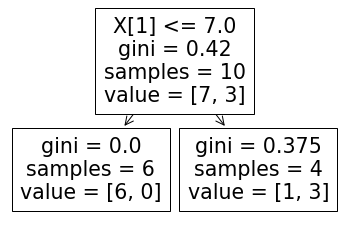

In [118]:
dtc = DecisionTreeClassifier(max_depth=1)
x = df2.iloc[:,0:2].values
y = df2.iloc[:,-2:-1].values
dtc.fit(x,y)
plot_tree(dtc)

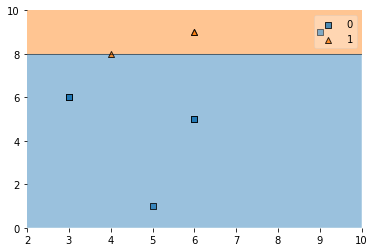

In [119]:
x1 = df2.iloc[:,0:2].values
y1 = df2.iloc[:,-2:-1].values.reshape(-1)
plot_decision_regions(x1,y1,clf=dtc,legend=1)

In [120]:
df2['ypredict'] = dtc.predict(x)
df2

,x1,x2,y,weight,ypredict
6,6,5,0,0.1,0
3,4,8,1,0.1,1
4,5,1,0,0.1,0
8,9,9,0,0.1,1
6,6,5,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,1
2,3,6,0,0.1,0
5,6,9,1,0.1,1


In [129]:
def calculated_model_weight(error):
    return 0.5*np.log((1-error)/(error+0.0001))
alpha1 = calculated_model_weight(0.1)
alpha1

1.098112538501568

In [130]:
def update_row_weight(row,alpha=alpha1):
    if row['y']==row['ypredict']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)
df2['updated_weight'] = df2.apply(update_row_weight,axis=1)
df2

,x1,x2,y,weight,ypredict,updated_weight,normalized,upper,lower
6,6,5,0,0.1,0,0.03335,0.076935,0.076935,0.000000
3,4,8,1,0.1,1,0.03335,0.076935,0.153870,0.076935
4,5,1,0,0.1,0,0.03335,0.076935,0.230805,0.153870
8,9,9,0,0.1,1,0.29985,0.307586,0.538391,0.230805
6,6,5,0,0.1,0,0.03335,0.076935,0.615325,0.538391
2,3,6,0,0.1,0,0.03335,0.076935,0.692260,0.615325
2,3,6,0,0.1,0,0.03335,0.076935,0.769195,0.692260
5,6,9,1,0.1,1,0.03335,0.076935,0.846130,0.769195
2,3,6,0,0.1,0,0.03335,0.076935,0.923065,0.846130
5,6,9,1,0.1,1,0.03335,0.076935,1.000000,0.923065


In [131]:
df2['normalized'] = df2['updated_weight']/df2['updated_weight'].sum()
df2

,x1,x2,y,weight,ypredict,updated_weight,normalized,upper,lower
6,6,5,0,0.1,0,0.03335,0.055583,0.076935,0.000000
3,4,8,1,0.1,1,0.03335,0.055583,0.153870,0.076935
4,5,1,0,0.1,0,0.03335,0.055583,0.230805,0.153870
8,9,9,0,0.1,1,0.29985,0.499750,0.538391,0.230805
6,6,5,0,0.1,0,0.03335,0.055583,0.615325,0.538391
2,3,6,0,0.1,0,0.03335,0.055583,0.692260,0.615325
2,3,6,0,0.1,0,0.03335,0.055583,0.769195,0.692260
5,6,9,1,0.1,1,0.03335,0.055583,0.846130,0.769195
2,3,6,0,0.1,0,0.03335,0.055583,0.923065,0.846130
5,6,9,1,0.1,1,0.03335,0.055583,1.000000,0.923065


In [132]:
df2['upper'] = np.cumsum(df2['normalized'])
df2['lower'] = df2['upper']-df2['normalized']
df2

,x1,x2,y,weight,ypredict,updated_weight,normalized,upper,lower
6,6,5,0,0.1,0,0.03335,0.055583,0.055583,0.000000
3,4,8,1,0.1,1,0.03335,0.055583,0.111167,0.055583
4,5,1,0,0.1,0,0.03335,0.055583,0.166750,0.111167
8,9,9,0,0.1,1,0.29985,0.499750,0.666500,0.166750
6,6,5,0,0.1,0,0.03335,0.055583,0.722083,0.666500
2,3,6,0,0.1,0,0.03335,0.055583,0.777667,0.722083
2,3,6,0,0.1,0,0.03335,0.055583,0.833250,0.777667
5,6,9,1,0.1,1,0.03335,0.055583,0.888833,0.833250
2,3,6,0,0.1,0,0.03335,0.055583,0.944417,0.888833
5,6,9,1,0.1,1,0.03335,0.055583,1.000000,0.944417


In [133]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['upper']> a and a>row['lower']:
                indices.append(index)
    return indices
indexvalue = create_new_dataset(df2)
print(indexvalue)

df3 = df2.iloc[indexvalue,[0,1,2,3]]
df3

[8, 4, 2, 8, 2, 8, 3, 6, 3, 2]


,x1,x2,y,weight
2,3,6,0,0.1
6,6,5,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1


# Iteration 3

[Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = 10.0')]

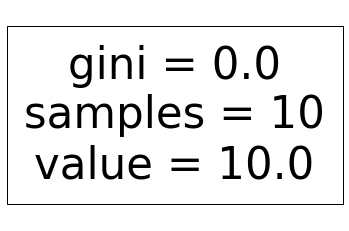

In [134]:
dtc = DecisionTreeClassifier(max_depth=1)
x = df3.iloc[:,0:2].values
y = df3.iloc[:,-2:-1].values
dtc.fit(x,y)
plot_tree(dtc)

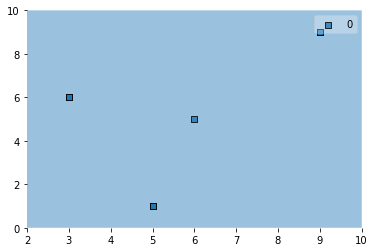

In [135]:
x1 = df3.iloc[:,0:2].values
y1 = df3.iloc[:,-2:-1].values.reshape(-1)
plot_decision_regions(x1,y1,clf=dtc,legend=1)

In [136]:
df3['ypredict'] = dtc.predict(x)
df3

,x1,x2,y,weight,ypredict
2,3,6,0,0.1,0
6,6,5,0,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0
